In [1423]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

## Coursera

In [1424]:
coursera_data_raw = pd.read_csv("../data/Coursera_courses.csv")
coursera_data_raw

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training
...,...,...,...,...
618,Accounting Data Analytics with Python,University of Illinois at Urbana-Champaign,https://www.coursera.org/learn/accounting-data...,accounting-data-analytics-python
619,Introduction to Molecular Spectroscopy,University of Manchester,https://www.coursera.org/learn/spectroscopy,spectroscopy
620,Managing as a Coach,"University of California, Davis",https://www.coursera.org/learn/managing-as-a-c...,managing-as-a-coach
621,The fundamentals of hotel distribution,ESSEC Business School,https://www.coursera.org/learn/hotel-distribution,hotel-distribution


En primer lugar, se realiza una verificación del tipo de datos y la presencia de valores nulos en cada columna. En este caso particular, se observa que los 623 registros del conjunto de datos no contienen valores nulos, lo que indica que no será necesario realizar ningún tratamiento específico para manejar registros faltantes.

In [1425]:
coursera_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


In [1426]:
coursera_data = coursera_data_raw[['name', 'institution', 'course_id']]
coursera_data.rename(columns={'name': 'course_name'}, inplace=True)
coursera_data.head()

,course_name,institution,course_id
0,Machine Learning,Stanford University,machine-learning
1,Indigenous Canada,University of Alberta,indigenous-canada
2,The Science of Well-Being,Yale University,the-science-of-well-being
3,Technical Support Fundamentals,Google,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,google-cbrs-cpi-training


Llama la atención la cantidad de intituciones que tienen por lo menos un curso en la página de coursera.

In [1427]:
coursera_data['institution'].nunique()

134

Por último, se verifica que no existan registros duplicados en el dataset.

In [1428]:
coursera_data.duplicated().sum()

0

In [1429]:
coursera_reviews_raw = pd.read_csv("../data/Coursera_reviews.csv")
coursera_reviews_raw

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training
...,...,...,...,...,...
1454706,g,By Brijesh K,"Aug 25, 2020",5,computer-networking
1454707,.,By Vasavi V M,"Jul 02, 2020",5,computer-networking
1454708,.,By Drishti D,"Jun 20, 2020",5,computer-networking
1454709,.,By FAUSTINE F K,"Jun 07, 2020",5,computer-networking


Al analizar el dataset, se observa que la columna ``reviews`` presenta algunos valores nulos, mientras que las demás columnas no contienen valores nulos. Esta situación es positiva, ya que indica que no será necesario eliminar los registros que no tengan una reseña.

El dataframe de reseñas desempeñará un papel importante en la medición de la actividad de los cursos y sus calificaciones. Aunque algunos registros no tengan valores en la columna ``reviews``, aún se podrán utilizar otros atributos y columnas para analizar la actividad y las calificaciones de los cursos. Esto asegura que se pueda realizar un análisis completo y aprovechar al máximo la información disponible en el dataset.

In [1430]:
coursera_reviews_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454558 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
dtypes: int64(1), object(4)
memory usage: 55.5+ MB


Con respecto al tipo de datos de cada columna, se observa que todas las columnas tienen un formato adecuado, excepto la columna ``date_reviews``. Para asegurar una manipulación y análisis preciso de los datos, será necesario realizar el proceso correspondiente para convertir esta columna en un tipo de datos datetime. Esto permitirá trabajar con las fechas de manera eficiente y facilitará futuros cálculos, filtrados y visualizaciones relacionados con las fechas de las reseñas.

Continuando con la verificación de registros duplicados, se ha identificado una cifra alarmante de 934,764 registros duplicados en el dataset. Esto representa aproximadamente el 64% de los datos totales. La presencia de una cantidad tan significativa de registros duplicados puede tener un impacto negativo en el análisis de datos, ya que puede generar sesgos y distorsiones en los resultados obtenidos.

In [1431]:
coursera_reviews_raw.duplicated().sum()

934764

Para simplificar el análisis y enfocarnos en los aspectos relevantes, se tomó la decisión de no utilizar el nombre de los usuarios (``reviewers``) en este análisis. Dado que no es una variable que aporte información significativa o relevante para los objetivos específicos del análisis, se considera apropiado desestimarla.

Además, se procede a eliminar los registros duplicados del dataset para garantizar la integridad y la calidad de los datos. Al eliminar los registros duplicados, se asegura que cada entrada en el dataset sea única y represente información única y válida para su posterior análisis.

In [1432]:
coursera_reviews = coursera_reviews_raw.drop(['reviewers'], axis=1)
coursera_reviews = coursera_reviews.drop_duplicates()
coursera_reviews.shape[0]

519461

Con respecto a la columna ``date_reviews``, anteriormente se mencionó que no se encontraba en el formato adecuado. Para corregir esto y asegurar un manejo preciso de las fechas, se procedió a convertir esta columna al tipo de dato datetime.

In [1433]:
coursera_reviews['date_reviews'] = pd.to_datetime(coursera_reviews['date_reviews'], format="%b %d, %Y")
coursera_reviews['year_reviews'] = coursera_reviews['date_reviews'].dt.year
coursera_reviews['month_reviews'] = coursera_reviews['date_reviews'].dt.month
coursera_reviews.head(3)

,reviews,date_reviews,rating,course_id,year_reviews,month_reviews
0,"Pretty dry, but I was able to pass with just t...",2020-02-12,4,google-cbrs-cpi-training,2020,2
1,would be a better experience if the video and ...,2020-09-28,4,google-cbrs-cpi-training,2020,9
2,Information was perfect! The program itself wa...,2020-04-08,4,google-cbrs-cpi-training,2020,4


In [1434]:
coursera_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 519461 entries, 0 to 1454644
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   reviews        519400 non-null  object        
 1   date_reviews   519461 non-null  datetime64[ns]
 2   rating         519461 non-null  int64         
 3   course_id      519461 non-null  object        
 4   year_reviews   519461 non-null  int32         
 5   month_reviews  519461 non-null  int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(2)
memory usage: 23.8+ MB


## edX

In [1435]:
edx_data_raw = pd.read_csv("../data/edx_courses.csv")
edx_data_raw

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,Leaders in Citizen Security and Justice Manage...,"Learn about the latest in prevention, police a...",NaN,Self-paced on your time,Inter-American Development Bank,Olga Espinoza-Eduardo Pazinato-Alejandra Mera-...,Intermediate,Social Sciences,English,English,4–5 hours per week,10 Weeks,FREE-Add a Verified Certificate for $25 USD,The high rates of crime and violence are two o...,NaN,https://www.edx.org/course/leaders-in-citizen-...
971,Pattern Studying and Making | 图案审美与创作,Fantastic experiences in beauty and its repres...,NaN,Self-paced on your time,Tsinghua University,Yuehua Nie,Introductory,Art & Culture,中文,"English, 中文",3–5 hours per week,12 Weeks,FREE-Add a Verified Certificate for $139 USD,Are you an original designer? Or a DIY fancier...,NaN,https://www.edx.org/course/pattern-studying-an...
972,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,"11,246",Self-paced on your time,École polytechnique fédérale de Lausanne,Wulfram Gerstner,Advanced,Biology & Life Sciences,English,English,4–6 hours per week,6 Weeks,FREE-Add a Verified Certificate for $139 USD,What happens in your brain when you make a dec...,Textbook: Neuronal Dynamics - from single neur...,https://www.edx.org/course/computational-neuro...
973,Cities and the Challenge of Sustainable Develo...,What is a sustainable city? Learn the basics h...,"8,775",Self-paced on your time,SDG Academy,Jeffrey D. Sachs,Introductory,Environmental Studies,English,English,1–2 hours per week,1 Weeks,FREE-Add a Verified Certificate for $25 USD,"According to the United Nations, urbanization ...",Module 1: Introduction to the SDGsProfessor Je...,https:

In [1436]:
edx_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     414 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

En el dataset de edX, todas las columnas son de tipo string y algunas contienen valores nulos. Al igual que en el dataset anterior, los valores nulos en la mayoría de las columnas no tienen una relevancia significativa para el análisis. Sin embargo, es importante destacar que la columna ``n_enrolled``, que indica la cantidad de estudiantes inscritos en los cursos, puede verse afectada por esta condición de valores nulos. Por lo tanto, se debe tener precaución al analizar y utilizar la información de esta columna en el análisis, ya que los valores nulos podrían afectar la precisión de los resultados relacionados con la cantidad de estudiantes inscritos en los cursos de edX.

In [1437]:
edx_data_raw.duplicated().sum()

1

In [1438]:
edx_data_raw.isna().sum()

title                   0
summary                53
n_enrolled            120
course_type             0
institution             0
instructors             3
Level                   0
subject                 0
language                0
subtitles               3
course_effort           0
course_length           0
price                   0
course_description     40
course_syllabus       561
course_url              0
dtype: int64

Durante la revisión del dataset, se identificó que algunas columnas no son relevantes para el análisis, como ``course_description`` y ``course_url``. Estas columnas no aportan información directamente relacionada con los aspectos que se desean analizar, por lo que se ha decidido excluirlas del análisis.

Además, se observó que la columna ``course_syllabus`` contiene una cantidad considerable de valores nulos, lo que dificulta su uso en el análisis. Por lo tanto, se optó por utilizar únicamente la columna ``summary`` para obtener información sobre los cursos.

Esta selección de columnas más relevantes, como ``summary``, permitirá concentrarse en los aspectos clave de los cursos y obtener una visión más precisa y concisa de la información necesaria para el análisis.

In [1439]:
edx_data = edx_data_raw.drop(['course_description', 'course_syllabus', 'course_url'], axis=1)

Se procede a eliminar el uSe identificó la presencia de un único registro duplicado en el dataset y, por lo tanto, se procedió a eliminarlo.nico registro duplicado que se encontró en el dataset.

In [1440]:
edx_data = edx_data.drop_duplicates()
edx_data.shape[0]

974

Con el objetivo de verificar si los valores en la columna ``course_length`` están expresados en la misma unidad de medida, específicamente en semanas, se optó por buscar los valores únicos en esta columna. Dado que el tamaño del dataset es relativamente pequeño, esta búsqueda se realizará para determinar si existe alguna variabilidad en las unidades de medida utilizadas para representar la duración de los cursos.

In [1441]:
edx_data['course_length'].unique()

array(['2 Weeks', '7 Weeks', '12 Weeks', '13 Weeks', '4 Weeks', '6 Weeks',
       '10 Weeks', '8 Weeks', '5 Weeks', '16 Weeks', '15 Weeks',
       '1 Weeks', '11 Weeks', '14 Weeks', '9 Weeks', '3 Weeks',
       '18 Weeks', '17 Weeks'], dtype=object)

In [1442]:
edx_data['course_length'] = edx_data['course_length'].apply(lambda x: int(x.split()[0]))
edx_data['n_enrolled'] =  edx_data['n_enrolled'].str.replace(',', '')
edx_data['n_enrolled'] =  edx_data['n_enrolled'].fillna('0')
edx_data['n_enrolled'] =  edx_data['n_enrolled'].apply(lambda x: int(x))


In [1443]:
edx_data['price'].unique()

array(['FREE-Add a Verified Certificate for $49 USD',
       'FREE-Add a Verified Certificate for $90 USD',
       'FREE-Add a Verified Certificate for $199 USD',
       'FREE-Add a Verified Certificate for $249 USD',
       'FREE-Add a Verified Certificate for $5 USD',
       'FREE-Add a Verified Certificate for $99 USD',
       'FREE-Add a Verified Certificate for $39 USD',
       'FREE-Add a Verified Certificate for $399 USD',
       'FREE-Add a Verified Certificate for $149 USD',
       'FREE-Add a Verified Certificate for $125 USD',
       'FREE-Add a Verified Certificate for $40 USD',
       'FREE-Add a Verified Certificate for $25 USD',
       'FREE-Add a Verified Certificate for $50 USD',
       'FREE-Add a Verified Certificate for $169 USD',
       'FREE-Add a Verified Certificate for $70 USD',
       'FREE-Add a Verified Certificate for $79 USD',
       'FREE-Add a Verified Certificate for $150 USD',
       'FREE-Add a Verified Certificate for $69 USD',
       'FREE-Add a Ver

In [1444]:
edx_data['verified_certificate_price'] = edx_data['price'].apply(lambda x: float(x.split('$')[1].split()[0]))
edx_data['price'] = edx_data['price'].apply(lambda x: x.split('-')[0].capitalize())

In [1445]:
edx_data.head(3)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,verified_certificate_price
0,How to Learn Online,Learn essential strategies for successful onli...,124980,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2,Free,49.0
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7,Free,49.0
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12,Free,90.0


In [1446]:
edx_data['course_effort'].unique()

array(['2–3 hours per week', '2–4 hours per week', '6–18 hours per week',
       '10–15 hours per week', '5–7 hours per week',
       '8–10 hours per week', '1–3 hours per week', '3–4 hours per week',
       '3–5 hours per week', '2–6 hours per week', '1–2 hours per week',
       '2–5 hours per week', '4–6 hours per week', '10–30 hours per week',
       '6–9 hours per week', '3–6 hours per week', '5–10 hours per week',
       '4–5 hours per week', '5–8 hours per week', '5–6 hours per week',
       '9–10 hours per week', '4–8 hours per week',
       '15–20 hours per week', '6–8 hours per week',
       '10–14 hours per week', '10–20 hours per week',
       '8–12 hours per week', '4–10 hours per week',
       '10–12 hours per week', '7–10 hours per week',
       '3–7 hours per week', '1–4 hours per week', '6–10 hours per week',
       '1–5 hours per week', '8–9 hours per week', '6–12 hours per week',
       '3–8 hours per week', '1–10 hours per week',
       '10–18 hours per week', '4–12 

In [1447]:
def calculate_average(text):
    text = text.split()[0]
    values = text.split('–')
    min_value = int(values[0])
    max_value = int(values[1])
    return (min_value + max_value) / 2

edx_data['course_effort'] = edx_data['course_effort'].apply(calculate_average)

In [1448]:
edx_data['instructors'] = edx_data['instructors'].str.split('-')

In [1449]:
edx_data['language'].unique()

array(['English', 'Español', 'Italiano', '日本語', 'Français', '中文',
       'Português', 'اللغة العربية', 'Deutsch'], dtype=object)

In [1450]:
edx_data['subtitles'] = edx_data['subtitles'].str.split(',')

In [1451]:
edx_data.rename(columns = {'title': 'course_name', 
                 'summary': 'course_summary', 
                 'n_enrolled': 'enrrollment_count', 
                 'Level': 'course_level', 'subject': 
                 'course_subject', 'course_effort': 'avg_course_effort', 'course_length': 'duration_in_weeks','price': 'course_price'}, inplace=True)

In [1452]:
edx_data.head(3)

,course_name,course_summary,enrrollment_count,course_type,institution,instructors,course_level,course_subject,language,subtitles,avg_course_effort,duration_in_weeks,course_price,verified_certificate_price
0,How to Learn Online,Learn essential strategies for successful onli...,124980,Self-paced on your time,edX,"[Nina Huntemann, Robyn Belair, Ben Piscopo]",Introductory,Education & Teacher Training,English,[English],2.5,2,Free,49.0
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864,Self-paced on your time,The University of Michigan,[Charles Severance],Introductory,Computer Science,English,[English],3.0,7,Free,49.0
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271,Self-paced on your time,Harvard University,"[David J. Malan, Doug Lloyd, Brian Yu]",Introductory,Computer Science,English,[English],12.0,12,Free,90.0


In [1453]:
edx_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 974 entries, 0 to 974
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   course_name                 974 non-null    object 
 1   course_summary              921 non-null    object 
 2   enrrollment_count           974 non-null    int64  
 3   course_type                 974 non-null    object 
 4   institution                 974 non-null    object 
 5   instructors                 971 non-null    object 
 6   course_level                974 non-null    object 
 7   course_subject              974 non-null    object 
 8   language                    974 non-null    object 
 9   subtitles                   971 non-null    object 
 10  avg_course_effort           974 non-null    float64
 11  duration_in_weeks           974 non-null    int64  
 12  course_price                974 non-null    object 
 13  verified_certificate_price  974 non-null

## Udemy

In [1454]:
udemy_data_raw = pd.read_csv("../data/udemy_courses.csv")
udemy_data_raw

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


In [1455]:
udemy_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [1456]:
udemy_data_raw.duplicated().sum()

6

In [1457]:
udemy_data_raw.isna().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [1458]:
udemy_data = udemy_data_raw.drop(['url'], axis=1)
udemy_data = udemy_data.drop_duplicates()
udemy_data.shape[0]

3672

In [1459]:
udemy_data['level'].unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

In [1460]:
udemy_data['subject'].unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

In [1461]:
udemy_data['published_timestamp'] = pd.to_datetime(udemy_data['published_timestamp'])

In [1462]:
udemy_data.rename(columns = {'price': 'course_price', 
                             'level': 'course_level', 
                             'published_timestamp': 'published_date'}, inplace=True)

In [1463]:
udemy_data.head(3)

,course_id,course_title,is_paid,course_price,num_subscribers,num_reviews,num_lectures,course_level,content_duration,published_date,subject
0,1070968,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance


In [1464]:
udemy_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3672 entries, 0 to 3677
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   course_id         3672 non-null   int64              
 1   course_title      3672 non-null   object             
 2   is_paid           3672 non-null   bool               
 3   course_price      3672 non-null   int64              
 4   num_subscribers   3672 non-null   int64              
 5   num_reviews       3672 non-null   int64              
 6   num_lectures      3672 non-null   int64              
 7   course_level      3672 non-null   object             
 8   content_duration  3672 non-null   float64            
 9   published_date    3672 non-null   datetime64[ns, UTC]
 10  subject           3672 non-null   object             
dtypes: bool(1), datetime64[ns, UTC](1), float64(1), int64(5), object(3)
memory usage: 319.1+ KB


---

## Coursera

In [1465]:
coursera_data

,course_name,institution,course_id
0,Machine Learning,Stanford University,machine-learning
1,Indigenous Canada,University of Alberta,indigenous-canada
2,The Science of Well-Being,Yale University,the-science-of-well-being
3,Technical Support Fundamentals,Google,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,google-cbrs-cpi-training
...,...,...,...
618,Accounting Data Analytics with Python,University of Illinois at Urbana-Champaign,accounting-data-analytics-python
619,Introduction to Molecular Spectroscopy,University of Manchester,spectroscopy
620,Managing as a Coach,"University of California, Davis",managing-as-a-coach
621,The fundamentals of hotel distribution,ESSEC Business School,hotel-distribution


In [1466]:
coursera_reviews.head(3)

,reviews,date_reviews,rating,course_id,year_reviews,month_reviews
0,"Pretty dry, but I was able to pass with just t...",2020-02-12,4,google-cbrs-cpi-training,2020,2
1,would be a better experience if the video and ...,2020-09-28,4,google-cbrs-cpi-training,2020,9
2,Information was perfect! The program itself wa...,2020-04-08,4,google-cbrs-cpi-training,2020,4


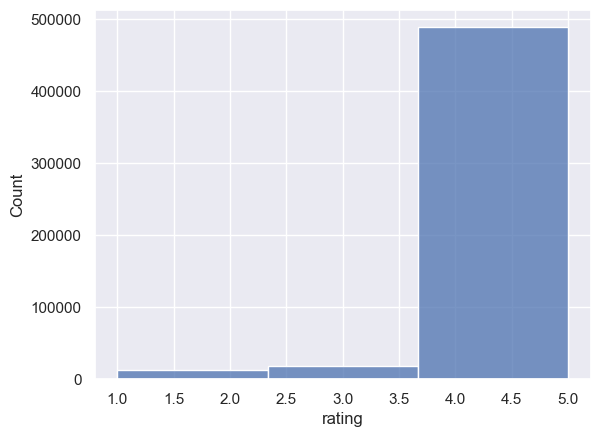

In [1467]:
sns.histplot(data=coursera_reviews, x="rating", bins=3);

In [1468]:
reviews_by_course = coursera_reviews.groupby('course_id').size().reset_index(name='num_reviews')
reviews_by_course = pd.merge(coursera_data, reviews_by_course, on='course_id', how='left')
reviews_by_course = reviews_by_course.sort_values(by=['num_reviews'], ascending=False)
reviews_by_course

,course_name,institution,course_id,num_reviews
7,Programming for Everybody (Getting Started wit...,University of Michigan,python,15149.0
0,Machine Learning,Stanford University,machine-learning,12677.0
12,Neural Networks and Deep Learning,DeepLearning.AI,neural-networks-deep-learning,12292.0
3,Technical Support Fundamentals,Google,technical-support-fundamentals,12053.0
24,Learning How to Learn: Powerful mental tools t...,University of California San Diego,learning-how-to-learn,11871.0
...,...,...,...,...
529,Digital Marketing Analytics in Practice,University of Illinois at Urbana-Champaign,digital-analytics,NaN
557,Dairy Production and Management,The Pennsylvania State University,dairy-production,NaN
569,Security & Safety Challenges in a Globalized W...,Universiteit Leiden,security-safety-globalized-world,NaN
621,The fundamentals of hotel distribution,ESSEC Business School,hotel-distribution,NaN


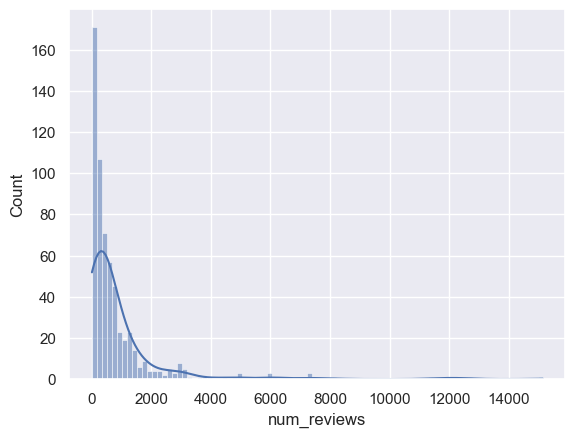

In [1469]:
sns.histplot(data=reviews_by_course, x="num_reviews", kde=True);

In [1470]:
reviews_by_course['num_reviews'].isna().sum()

19

In [1471]:
reviews_by_course.dropna(inplace=True)
reviews_by_course.shape[0]

604

In [1472]:
reviews_by_course['num_reviews'] = reviews_by_course['num_reviews'].astype(int)

In [1473]:
average_rating = coursera_reviews.groupby('course_id')['rating'].mean()
reviews_by_course = pd.merge(reviews_by_course, average_rating, on='course_id', how='left')
reviews_by_course.rename(columns = {'rating': 'avg_rating'}, inplace=True)
reviews_by_course['avg_rating'] = reviews_by_course['avg_rating'].round(2)
reviews_by_course

,course_name,institution,course_id,num_reviews,avg_rating
0,Programming for Everybody (Getting Started wit...,University of Michigan,python,15149,4.58
1,Machine Learning,Stanford University,machine-learning,12677,4.74
2,Neural Networks and Deep Learning,DeepLearning.AI,neural-networks-deep-learning,12292,4.77
3,Technical Support Fundamentals,Google,technical-support-fundamentals,12053,4.77
4,Learning How to Learn: Powerful mental tools t...,University of California San Diego,learning-how-to-learn,11871,4.80
...,...,...,...,...,...
599,Social and Economic Networks: Models and Anal...,Stanford University,social-economic-networks,2,1.00
600,Introduction to Healthcare,Stanford University,intro-to-healthcare,2,4.00
601,Epigenetic Control of Gene Expression,The University of Melbourne,epigenetics,2,1.00
602,Curanderismo: Traditional Healing Using Plants,University of New Mexico,curanderismo-plants,2,1.00


In [1474]:
courses_by_institution = coursera_data.groupby('institution').size().reset_index(name='total_courses')
courses_by_institution = courses_by_institution.sort_values(by=['total_courses'], ascending=False)
courses_by_institution

,institution,total_courses
118,University of Pennsylvania,43
115,University of Michigan,31
18,Duke University,24
31,Google Cloud,22
35,IBM,18
...,...,...
98,University of Arizona,1
48,McMaster University,1
45,Ludwig-Maximilians-Universität München (LMU),1
71,The Chinese University of Hong Kong,1


In [1475]:
reviews_by_institution = reviews_by_course.groupby('institution')['num_reviews'].mean().reset_index(name='avg_reviews')
ratings_by_institution = reviews_by_course.groupby('institution')['avg_rating'].mean().reset_index(name='avg_ratings')

courses_by_institution = pd.merge(courses_by_institution, reviews_by_institution, on='institution', how='left')
courses_by_institution = pd.merge(courses_by_institution, ratings_by_institution, on='institution', how='left')

courses_by_institution['avg_reviews'] = courses_by_institution['avg_reviews'].round(2)
courses_by_institution['avg_ratings'] = courses_by_institution['avg_ratings'].round(2)
courses_by_institution

,institution,total_courses,avg_reviews,avg_ratings
0,University of Pennsylvania,43,599.05,4.66
1,University of Michigan,31,1841.55,4.67
2,Duke University,24,719.26,4.63
3,Google Cloud,22,771.73,4.49
4,IBM,18,1386.33,4.44
...,...,...,...,...
129,University of Arizona,1,790.00,4.88
130,McMaster University,1,2727.00,4.84
131,Ludwig-Maximilians-Universität München (LMU),1,465.00,4.76
132,The Chinese University of Hong Kong,1,172.00,4.71


In [1476]:
courses_by_institution[courses_by_institution['avg_ratings'].isna()]

,institution,total_courses,avg_reviews,avg_ratings
99,Delft University of Technology,1,NaN,NaN
109,The Pennsylvania State University,1,NaN,NaN


In [1477]:
courses_by_institution.dropna(inplace=True)
courses_by_institution.shape[0]

132

In [1478]:
coursera_reviews

,reviews,date_reviews,rating,course_id,year_reviews,month_reviews
0,"Pretty dry, but I was able to pass with just t...",2020-02-12,4,google-cbrs-cpi-training,2020,2
1,would be a better experience if the video and ...,2020-09-28,4,google-cbrs-cpi-training,2020,9
2,Information was perfect! The program itself wa...,2020-04-08,4,google-cbrs-cpi-training,2020,4
3,A few grammatical mistakes on test made me do ...,2020-02-24,4,google-cbrs-cpi-training,2020,2
4,Excellent course and the training provided was...,2020-06-18,4,google-cbrs-cpi-training,2020,6
...,...,...,...,...,...,...
1454636,amazing,2020-10-10,5,computer-networking,2020,10
1454639,great,2020-10-07,5,computer-networking,2020,10
1454642,Nice,2020-10-10,5,computer-networking,2020,10
1454643,Good,2020-10-08,5,computer-networking,2020,10


In [1479]:
reviews_by_month = coursera_reviews.groupby(['month_reviews', 'year_reviews']).size().reset_index(name='total_reviews')
reviews_by_month

,month_reviews,year_reviews,total_reviews
0,1,2016,3800
1,1,2017,3671
2,1,2018,4986
3,1,2019,5545
4,1,2020,8355
...,...,...,...
58,12,2015,3082
59,12,2016,3401
60,12,2017,4333
61,12,2018,4369


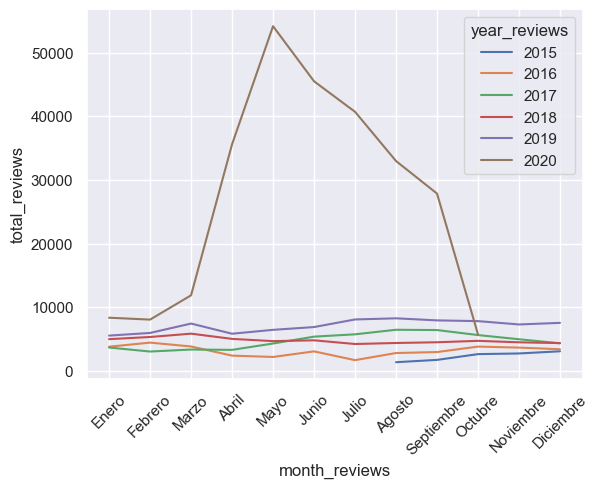

In [1480]:
sns.lineplot(x='month_reviews', y='total_reviews', hue='year_reviews', palette="deep", data=reviews_by_month)

months = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

plt.xticks(range(1, 13), months)
plt.xticks(rotation=45);

## edX

In [1481]:
edx_data.head(3)

,course_name,course_summary,enrrollment_count,course_type,institution,instructors,course_level,course_subject,language,subtitles,avg_course_effort,duration_in_weeks,course_price,verified_certificate_price
0,How to Learn Online,Learn essential strategies for successful onli...,124980,Self-paced on your time,edX,"[Nina Huntemann, Robyn Belair, Ben Piscopo]",Introductory,Education & Teacher Training,English,[English],2.5,2,Free,49.0
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864,Self-paced on your time,The University of Michigan,[Charles Severance],Introductory,Computer Science,English,[English],3.0,7,Free,49.0
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271,Self-paced on your time,Harvard University,"[David J. Malan, Doug Lloyd, Brian Yu]",Introductory,Computer Science,English,[English],12.0,12,Free,90.0


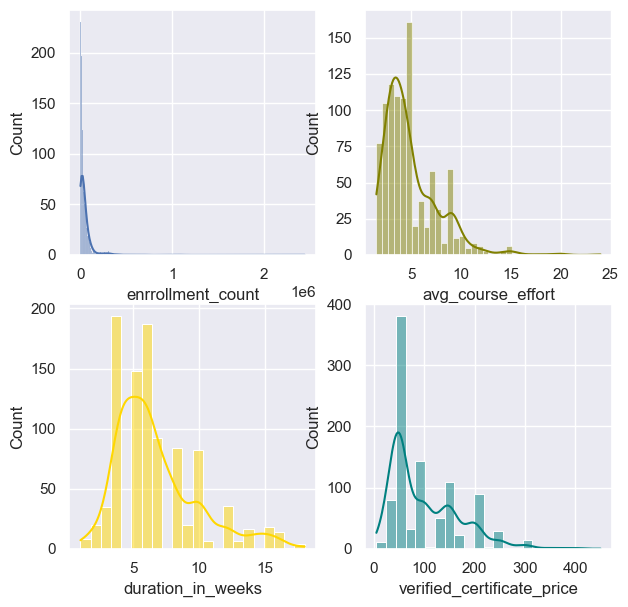

In [1482]:
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.histplot(data=edx_data, x="enrrollment_count", kde=True, ax=axs[0, 0])
sns.histplot(data=edx_data, x="avg_course_effort", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=edx_data, x="duration_in_weeks", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=edx_data, x="verified_certificate_price", kde=True, color="teal", ax=axs[1, 1])

plt.show()


In [1483]:
courses_by_level = edx_data.groupby('course_level').size().reset_index(name='total_courses')

enrrolled_by_level = edx_data.groupby('course_level')['enrrollment_count'].mean().reset_index(name='avg_enrrolled')
effort_by_level = edx_data.groupby('course_level')['avg_course_effort'].mean().reset_index(name='avg_effort')
weeks_by_level = edx_data.groupby('course_level')['duration_in_weeks'].mean().reset_index(name='avg_duration_weeks')
certificate_by_level = edx_data.groupby('course_level')['verified_certificate_price'].mean().reset_index(name='avg_certificate_price')

enrrolled_by_level['avg_enrrolled'] = enrrolled_by_level['avg_enrrolled'].round(2)
effort_by_level['avg_effort'] = effort_by_level['avg_effort'].round(2)
weeks_by_level['avg_duration_weeks'] = weeks_by_level['avg_duration_weeks'].round(2)
certificate_by_level['avg_certificate_price'] = certificate_by_level['avg_certificate_price'].round(2)

courses_by_level = pd.merge(courses_by_level, enrrolled_by_level, on='course_level')
courses_by_level = pd.merge(courses_by_level, effort_by_level, on='course_level')
courses_by_level = pd.merge(courses_by_level, weeks_by_level, on='course_level')
courses_by_level = pd.merge(courses_by_level, certificate_by_level, on='course_level')

courses_by_level


,course_level,total_courses,avg_enrrolled,avg_effort,avg_duration_weeks,avg_certificate_price
0,Advanced,87,34471.51,8.16,8.16,185.99
1,Intermediate,266,37826.49,5.35,7.02,99.61
2,Introductory,621,52140.81,4.25,6.36,88.85


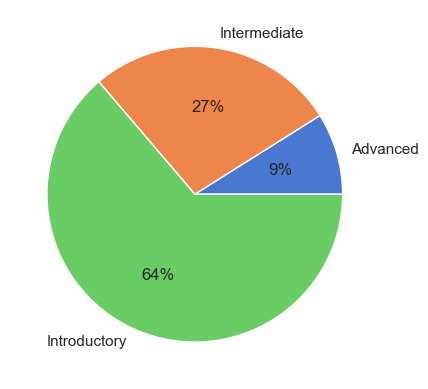

In [1484]:
# define Seaborn color palette to use
palette_color = sns.color_palette('muted')
  
# plotting data on chart
plt.pie(courses_by_level['total_courses'], labels=courses_by_level['course_level'], colors=palette_color, autopct='%.0f%%')
  
plt.show();

In [1485]:
courses_by_institution = edx_data.groupby('institution').size().reset_index(name='total_courses')
courses_by_institution = courses_by_institution.sort_values(by=['total_courses'], ascending=False)
courses_by_institution

,institution,total_courses
25,Harvard University,103
85,Universitat Politècnica de Valencia,47
39,Massachusetts Institute of Technology,41
17,Delft University of Technology,30
26,IBM,30
...,...,...
86,University System of Maryland-The University o...,1
73,The University of Tokyo,1
19,DelftXRWTHx-Delft University of Technology-RWT...,1
22,Educational Testing Service,1


In [1486]:
enrrolled_by_institution = edx_data.groupby('institution')['enrrollment_count'].mean().reset_index(name='avg_enrrolled')
effort_by_institution = edx_data.groupby('institution')['avg_course_effort'].mean().reset_index(name='avg_effort')
weeks_by_institution = edx_data.groupby('institution')['duration_in_weeks'].mean().reset_index(name='avg_duration_weeks')
certificate_by_institution = edx_data.groupby('institution')['verified_certificate_price'].mean().reset_index(name='avg_certificate_price')

enrrolled_by_institution['avg_enrrolled'] = enrrolled_by_institution['avg_enrrolled'].round(2)
effort_by_institution['avg_effort'] = effort_by_institution['avg_effort'].round(2)
weeks_by_institution['avg_duration_weeks'] = weeks_by_institution['avg_duration_weeks'].round(2)
certificate_by_institution['avg_certificate_price'] = certificate_by_institution['avg_certificate_price'].round(2)

courses_by_institution = pd.merge(courses_by_institution, enrrolled_by_institution, on='institution')
courses_by_institution = pd.merge(courses_by_institution, effort_by_institution, on='institution')
courses_by_institution = pd.merge(courses_by_institution, weeks_by_institution, on='institution')
courses_by_institution = pd.merge(courses_by_institution, certificate_by_institution, on='institution')

courses_by_institution


,institution,total_courses,avg_enrrolled,avg_effort,avg_duration_weeks,avg_certificate_price
0,Harvard University,103,129734.20,4.13,7.71,96.29
1,Universitat Politècnica de Valencia,47,45044.32,4.00,5.57,53.87
2,Massachusetts Institute of Technology,41,37734.41,7.37,11.12,134.20
3,Delft University of Technology,30,35785.10,5.68,6.87,85.40
4,IBM,30,28707.80,3.75,5.40,61.33
...,...,...,...,...,...,...
106,University System of Maryland-The University o...,1,12227.00,2.50,4.00,149.00
107,The University of Tokyo,1,19010.00,3.50,6.00,49.00
108,DelftXRWTHx-Delft University of Technology-RWT...,1,6951.00,5.50,10.00,50.00
109,Educational Testing Service,1,1022489.00,3.00,6.00,49.00


In [1487]:
courses_by_type = edx_data.groupby('course_type').size().reset_index(name='total_courses')

enrrolled_by_type = edx_data.groupby('course_type')['enrrollment_count'].mean().reset_index(name='avg_enrrolled')
effort_by_type = edx_data.groupby('course_type')['avg_course_effort'].mean().reset_index(name='avg_effort')
weeks_by_type = edx_data.groupby('course_type')['duration_in_weeks'].mean().reset_index(name='avg_duration_weeks')
certificate_by_type = edx_data.groupby('course_type')['verified_certificate_price'].mean().reset_index(name='avg_certificate_price')

enrrolled_by_type['avg_enrrolled'] = enrrolled_by_type['avg_enrrolled'].round(2)
effort_by_type['avg_effort'] = effort_by_type['avg_effort'].round(2)
weeks_by_type['avg_duration_weeks'] = weeks_by_type['avg_duration_weeks'].round(2)
certificate_by_type['avg_certificate_price'] = certificate_by_type['avg_certificate_price'].round(2)

courses_by_type = pd.merge(courses_by_type, enrrolled_by_type, on='course_type')
courses_by_type = pd.merge(courses_by_type, effort_by_type, on='course_type')
courses_by_type = pd.merge(courses_by_type, weeks_by_type, on='course_type')
courses_by_type = pd.merge(courses_by_type, certificate_by_type, on='course_type')

courses_by_type

,course_type,total_courses,avg_enrrolled,avg_effort,avg_duration_weeks,avg_certificate_price
0,Instructor-led on a course schedule,58,40875.38,8.59,10.53,197.31
1,Self-paced on your time,916,47019.15,4.67,6.46,94.34


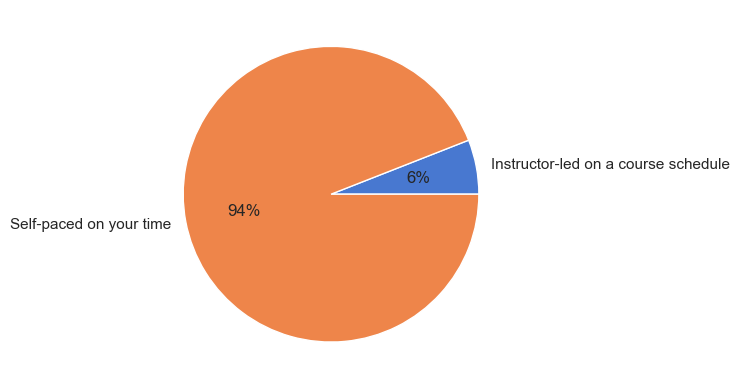

In [1488]:
palette_color = sns.color_palette('muted')
  
plt.pie(courses_by_type['total_courses'], labels=courses_by_type['course_type'], colors=palette_color, autopct='%.0f%%') 
plt.show();

In [1489]:
courses_by_lang = edx_data.groupby('language').size().reset_index(name='total_courses')
courses_by_lang = courses_by_lang.sort_values(by=['total_courses'], ascending=False)
courses_by_lang

,language,total_courses
1,English,776
2,Español,176
3,Français,7
4,Italiano,4
5,Português,4
7,中文,4
0,Deutsch,1
6,اللغة العربية,1
8,日本語,1


In [1490]:
enrrolled_by_lang = edx_data.groupby('language')['enrrollment_count'].mean().reset_index(name='avg_enrrolled')
certificate_by_lang = edx_data.groupby('language')['verified_certificate_price'].mean().reset_index(name='avg_certificate_price')

enrrolled_by_lang['avg_enrrolled'] = enrrolled_by_lang['avg_enrrolled'].round(2)
certificate_by_lang['avg_certificate_price'] = certificate_by_lang['avg_certificate_price'].round(2)

courses_by_lang = pd.merge(courses_by_lang, enrrolled_by_lang, on='language')
courses_by_lang = pd.merge(courses_by_lang, certificate_by_lang, on='language')

courses_by_lang

,language,total_courses,avg_enrrolled,avg_certificate_price
0,English,776,52987.51,112.23
1,Español,176,21050.99,50.49
2,Français,7,23121.14,110.43
3,Italiano,4,70396.25,49.00
4,Português,4,11005.25,62.00
5,中文,4,14039.50,116.50
6,Deutsch,1,10657.00,49.00
7,اللغة العربية,1,0.00,49.00
8,日本語,1,62757.00,99.00


In [1491]:
courses_by_lang['language'] = courses_by_lang['language'].replace({'Español': 'Spanish',
                                                                   'Français': 'French',
                                                                   'Italiano': 'Italian',
                                                                   'Português': 'Portuguese',
                                                                   '中文': 'Chinese',
                                                                   'Deutsch': 'German',
                                                                   'اللغة العربية': 'Arabic',
                                                                   '日本語': 'Japanese'})
courses_by_lang

,language,total_courses,avg_enrrolled,avg_certificate_price
0,English,776,52987.51,112.23
1,Spanish,176,21050.99,50.49
2,French,7,23121.14,110.43
3,Italian,4,70396.25,49.00
4,Portuguese,4,11005.25,62.00
5,Chinese,4,14039.50,116.50
6,German,1,10657.00,49.00
7,Arabic,1,0.00,49.00
8,Japanese,1,62757.00,99.00


In [1492]:
courses_by_subject = edx_data.groupby('course_subject').size().reset_index(name='total_courses')
courses_by_subject = courses_by_subject.sort_values(by=['total_courses'], ascending=False)
courses_by_subject

,course_subject,total_courses
6,Computer Science,166
3,Business & Management,164
7,Data Analysis & Statistics,71
19,Humanities,64
13,Engineering,58
30,Social Sciences,51
9,Economics & Finance,46
5,Communication,39
2,Biology & Life Sciences,35
20,Language,34


In [1493]:
enrrolled_by_subject = edx_data.groupby('course_subject')['enrrollment_count'].mean().reset_index(name='avg_enrrolled')
effort_by_subject = edx_data.groupby('course_subject')['avg_course_effort'].mean().reset_index(name='avg_effort')
weeks_by_subject = edx_data.groupby('course_subject')['duration_in_weeks'].mean().reset_index(name='avg_duration_weeks')
certificate_by_subject = edx_data.groupby('course_subject')['verified_certificate_price'].mean().reset_index(name='avg_certificate_price')

enrrolled_by_subject['avg_enrrolled'] = enrrolled_by_subject['avg_enrrolled'].round(2)
effort_by_subject['avg_effort'] = effort_by_subject['avg_effort'].round(2)
weeks_by_subject['avg_duration_weeks'] = weeks_by_subject['avg_duration_weeks'].round(2)
certificate_by_subject['avg_certificate_price'] = certificate_by_subject['avg_certificate_price'].round(2)

courses_by_subject = pd.merge(courses_by_subject, enrrolled_by_subject, on='course_subject')
courses_by_subject = pd.merge(courses_by_subject, effort_by_subject, on='course_subject')
courses_by_subject = pd.merge(courses_by_subject, weeks_by_subject, on='course_subject')
courses_by_subject = pd.merge(courses_by_subject, certificate_by_subject, on='course_subject')

courses_by_subject

,course_subject,total_courses,avg_enrrolled,avg_effort,avg_duration_weeks,avg_certificate_price
0,Computer Science,166,74986.37,5.54,6.51,125.01
1,Business & Management,164,43149.77,4.92,6.77,132.54
2,Data Analysis & Statistics,71,58691.85,4.64,6.07,92.55
3,Humanities,64,54752.19,4.46,6.23,66.02
4,Engineering,58,24083.43,6.41,7.34,116.98
5,Social Sciences,51,36164.29,4.25,7.00,75.80
6,Economics & Finance,46,18171.89,5.41,6.24,75.65
7,Communication,39,119008.38,4.17,5.15,95.28
8,Biology & Life Sciences,35,50395.20,4.87,6.94,88.51
9,Language,34,31272.26,4.28,5.79,82.71


In [1494]:
sub_frequency = edx_data['subtitles'].explode().value_counts().reset_index(name='total_courses')
sub_frequency

,subtitles,total_courses
0,English,788
1,Español,158
2,中文,37
3,Español,32
4,हिन्दी,11
5,Русский,9
6,Français,9
7,English,8
8,Português,7
9,Français,7


In [1495]:
sub_frequency['subtitles'] = sub_frequency['subtitles'].apply(lambda x: x.strip())
sub_frequency.drop_duplicates(subset='subtitles')
sub_frequency

,subtitles,total_courses
0,English,788
1,Español,158
2,中文,37
3,Español,32
4,हिन्दी,11
5,Русский,9
6,Français,9
7,English,8
8,Português,7
9,Français,7


In [1496]:
edx_data[['subtitles', 'enrrollment_count', 'verified_certificate_price']]

,subtitles,enrrollment_count,verified_certificate_price
0,[English],124980,49.0
1,[English],293864,49.0
2,[English],2442271,90.0
3,[English],129555,199.0
4,[English],81140,249.0
...,...,...,...
970,[English],0,25.0
971,"[English, 中文]",0,139.0
972,[English],11246,139.0
973,[English],8775,25.0


In [1497]:
edx_with_num_subs = edx_data[['subtitles', 'enrrollment_count', 'verified_certificate_price']]
edx_with_num_subs['subtitles'] = edx_with_num_subs['subtitles'].apply(lambda x: len(x) if isinstance(x, list) else 0)
edx_with_num_subs = edx_with_num_subs.rename(columns = {'subtitles': 'num_subtitles'})
edx_with_num_subs = edx_with_num_subs.sort_values(by=['num_subtitles'], ascending=False)
edx_with_num_subs

,num_subtitles,enrrollment_count,verified_certificate_price
202,9,79424,99.0
564,6,43125,5.0
26,5,392588,99.0
792,5,9668,49.0
253,5,23139,49.0
...,...,...,...
353,1,6703,49.0
974,1,0,79.0
640,0,28472,99.0
390,0,82210,249.0


In [1498]:
courses_by_num_subs = edx_with_num_subs.groupby('num_subtitles').size().reset_index(name='total_courses')
courses_by_num_subs

,num_subtitles,total_courses
0,0,3
1,1,886
2,2,65
3,3,9
4,4,6
5,5,3
6,6,1
7,9,1


In [1499]:
enrrolled_by_num_subs = edx_with_num_subs.groupby('num_subtitles')['enrrollment_count'].mean().reset_index(name='avg_enrrolled')
certificate_by_num_subs = edx_with_num_subs.groupby('num_subtitles')['verified_certificate_price'].mean().reset_index(name='avg_certificate_price')

enrrolled_by_num_subs['avg_enrrolled'] = enrrolled_by_num_subs['avg_enrrolled'].round(2)
certificate_by_num_subs['avg_certificate_price'] = certificate_by_num_subs['avg_certificate_price'].round(2)

courses_by_num_subs = pd.merge(courses_by_num_subs, enrrolled_by_num_subs, on='num_subtitles')
courses_by_num_subs = pd.merge(courses_by_num_subs, certificate_by_num_subs, on='num_subtitles')

courses_by_num_subs

,num_subtitles,total_courses,avg_enrrolled,avg_certificate_price
0,0,3,48990.33,199.00
1,1,886,46385.60,100.61
2,2,65,46014.83,95.37
3,3,9,22837.00,105.22
4,4,6,75209.67,111.67
5,5,3,141798.33,65.67
6,6,1,43125.00,5.00
7,9,1,79424.00,99.00


In [1500]:
courses_by_instructor = edx_data['instructors'].explode().value_counts().reset_index(name='total_courses')
courses_by_instructor

,instructors,total_courses
0,Rafael Irizarry,16
1,Peter K. Bol,9
2,Jeffrey D. Sachs,9
3,William C. Kirby,8
4,Maggie Sokolik,8
...,...,...
1551,Rafael Serrano,1
1552,Andrés Lloret Salom,1
1553,Julie Carmean,1
1554,Juan Carlos Lemus Romero,1


In [1501]:
instructors_expanded = edx_data.explode("instructors")

enrrolled_by_instructor = instructors_expanded.groupby('instructors')['enrrollment_count'].mean().reset_index(name='avg_enrrolled')
effort_by_instructor = instructors_expanded.groupby('instructors')['avg_course_effort'].mean().reset_index(name='avg_effort')
weeks_by_instructor = instructors_expanded.groupby('instructors')['duration_in_weeks'].mean().reset_index(name='avg_duration_weeks')
certificate_by_instructor = instructors_expanded.groupby('instructors')['verified_certificate_price'].mean().reset_index(name='avg_certificate_price')

enrrolled_by_instructor['avg_enrrolled'] = enrrolled_by_instructor['avg_enrrolled'].round(2)
effort_by_instructor['avg_effort'] = effort_by_instructor['avg_effort'].round(2)
weeks_by_instructor['avg_duration_weeks'] = weeks_by_instructor['avg_duration_weeks'].round(2)
certificate_by_instructor['avg_certificate_price'] = certificate_by_instructor['avg_certificate_price'].round(2)

courses_by_instructor = pd.merge(courses_by_instructor, enrrolled_by_instructor, on='instructors')
courses_by_instructor = pd.merge(courses_by_instructor, effort_by_instructor, on='instructors')
courses_by_instructor = pd.merge(courses_by_instructor, weeks_by_instructor, on='instructors')
courses_by_instructor = pd.merge(courses_by_instructor, certificate_by_instructor, on='instructors')

courses_by_instructor

,instructors,total_courses,avg_enrrolled,avg_effort,avg_duration_weeks,avg_certificate_price
0,Rafael Irizarry,16,130978.12,3.25,5.94,102.12
1,Peter K. Bol,9,48906.89,2.11,14.11,134.56
2,Jeffrey D. Sachs,9,9407.11,3.50,7.67,43.67
3,William C. Kirby,8,50332.62,2.00,15.00,139.00
4,Maggie Sokolik,8,92611.00,4.31,5.75,60.38
...,...,...,...,...,...,...
1551,Rafael Serrano,1,17344.00,8.00,4.00,49.00
1552,Andrés Lloret Salom,1,10265.00,4.50,6.00,50.00
1553,Julie Carmean,1,18595.00,3.50,16.00,25.00
1554,Juan Carlos Lemus Romero,1,18613.00,9.50,5.00,15.00
